<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/MNIST_image_dataset_LSTM_RNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNIST IMAGE DATASET CLASSIFICATION USING RNN AND LSTM

In [0]:
pip install tensorflow==1.4 #downgrade tensorflow to 1.4 to use function like keras placeholder

In [0]:
pip uninstall keras

Uninstalling Keras-2.1.5:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.1.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/keras/*
Proceed (y/n)? y
  Successfully uninstalled Keras-2.1.5


In [0]:
pip install keras==2.1.5 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/ba/65/e4aff762b8696ec0626a6654b1e73b396fcc8b7cc6b98d78a1bc53b85b48/Keras-2.1.5-py2.py3-none-any.whl


In [0]:
from keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

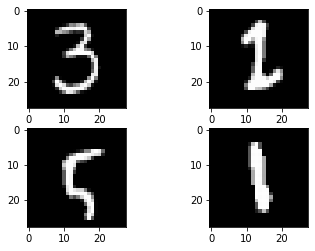

In [0]:
import matplotlib.pyplot as plt

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[50], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[70], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[100], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[200], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
#Reshape images 

x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
print(x_train[0].shape)

(28, 28)


In [0]:
x_train.shape[1:]

(28, 28)

In [0]:
#Build LSTM model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
num_classes = 10                   #(10 digits here from 0 to 10)

In [0]:
model = Sequential()

model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax')) #use softmax for multiclass classification, #10 = number of classes

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   #use sparse categorical croosentropy in multiclass classification when classes are as integers

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total para

In [0]:
pip install h5py

In [0]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

mc = ModelCheckpoint('best_LSTM_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [0]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[es, mc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.7098 - acc: 0.7637 - val_loss: 0.1602 - val_acc: 0.9541

Epoch 00001: val_loss improved from inf to 0.16021, saving model to best_LSTM_model.h5
Epoch 2/20
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1696 - acc: 0.9547 - val_loss: 0.0988 - val_acc: 0.9702

Epoch 00002: val_loss improved from 0.16021 to 0.09877, saving model to best_LSTM_model.h5
Epoch 3/20
60000/60000 [==============================] - 113s 2ms/step - loss: 0.1156 - acc: 0.9692 - val_loss: 0.0555 - val_acc: 0.9839

Epoch 00003: val_loss improved from 0.09877 to 0.05550, saving model to best_LSTM_model.h5
Epoch 4/20
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0890 - acc: 0.9770 - val_loss: 0.0587 - val_acc: 0.9831

Epoch 00004: val_loss did not improve
Epoch 00004: early stopping


In [0]:
#model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

In [0]:
from keras.models import load_model

saved_model = load_model('best_LSTM_model.h5')

In [0]:
test_accuracy = saved_model.evaluate(x_test, y_test, verbose=0)

print("Test accuracy: %3f=", test_accuracy)

Test accuracy: %3f= [0.055495321706181856, 0.9839]


##Implement Multilayer Perceptron on UFAR gate

In [0]:
import pandas as pd
data = { 'x1': [0,0,1,0,1,1,0],
         'x2': [0,1,0,1,0,1,0],
         'x3': [1,1,1,0,0,1,0],
         'y':  [0,1,1,1,1,0,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [0]:
df.head(10)

In [0]:
target = 'y'

X_features = df.drop(columns = [target])

numeric_features = X_features.select_dtypes(include='number').columns.tolist()

In [0]:
X = df[numeric_features]

In [0]:
import numpy as np
X = np.array(X)

In [0]:
X.shape

In [0]:
X.shape[1] #input_dimension for first layer

In [0]:
y = df[target]

In [0]:
y = np.array(y)

In [0]:
y.shape

In [0]:
#Coding y as 1 and -1 is mandatory for using Perceptron

y=np.array([1 if i==1 else -1 for i in y])

In [0]:
#Normalizing data is not needed in this case

###Implement Neural Network Structure

In [0]:
class NeuralNetwork: 
    
    def __init__(self):
        # Setup Arch
        self.inputs = 3 #no. of columns
        self.hiddenNodes = 4 
        self.outputNodes = 1
        
        # Initialize Weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)

In [0]:
nn = NeuralNetwork()

In [0]:
print("Layer 1 weights: \n", nn.weights1)
print("Layer 2 weights: \n", nn.weights2)

#####Implement Feed Forward funtionaliaty

In [0]:
class NeuralNetwork: 
    
    def __init__(self):
        # Setup Arch
        self.inputs = 3 #X.shape[1]
        self.hiddenNodes = 4 
        self.outputNodes = 1
        
        # Initialize Weights
      
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        
        
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weight Sum
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activation
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted Sum 2
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

In [0]:
# Try to make a prediction with our updated 'net

nn = NeuralNetwork()
output = nn.feed_forward(X[0])
print("intput", X[0])
print("output", output)
print("true_output", y[0])

###Implement Backpropagation

###Multilayer Perceptor implementation

In [0]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = X.shape[1]
        self.hiddenLayerSize = 4
        self.outputLayerSize = 1
        
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [0]:
from scipy import optimize

class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [0]:
NN = Neural_Network()

In [0]:
T = trainer(NN)

In [0]:
y = df[target]
y = np.array([1 if i==1 else -1 for i in y])

In [0]:
y.shape

In [0]:
X.shape

In [0]:
T.train(X,y)

###Perceptron implementation from assignment 1



In [0]:
class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [0]:
y=np.array([1 if i==1 else -1 for i in y])
y

In [0]:
X

In [0]:
import matplotlib.pyplot as plt


pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?